#Librerias e importación de base de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("survey1.csv")

#Analisis Exploratorio

In [3]:
df.head() #Muestra las primeras 5 columnas

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info() #Muestra la informacion de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
print(df['Country'].value_counts())
print("\n")
print(df['state'].unique())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

In [6]:
print(df['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [7]:
print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


#Preprocesamiento de datos

##Eliminar columnas irrelevantes

In [8]:
df.drop(['Timestamp','state','Country','comments'], axis=1, inplace=True)

In [9]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


##Eliminar datos incoherentes

In [10]:
df.drop(df[df['Age'] < 16].index, inplace=True)
df.drop(df[df['Age'] > 100].index, inplace=True)

In [11]:
print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


##Reenombrar datos

In [12]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)
df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)
df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

<ipython-input-12-c34d56c402ec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',


In [13]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['Female' 'Male' 'Other']
Gender
Male      986
Female    247
Other      18
Name: count, dtype: int64


##Imputación de datos

In [14]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t Know')
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't Know"],
      dtype=object)

In [15]:
df['self_employed'] = df['self_employed'].fillna('No') #Se reemplazo con la moda
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

##Categorizacion de datos

In [16]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't Know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTERVIEW :['

In [17]:
#Label Enconding the categorical variables
from sklearn.preprocessing import LabelEncoder

object_cols=['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()

for col in object_cols:
  label_encoder.fit(df[col])
  df[col] = label_encoder.transform(df[col])

In [18]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72] 
GENDER :[0 1 2] 
SELF_EMPLOYED :[0 1] 
FAMILY_HISTORY :[0 1] 
TREATMENT :[1 0] 
WORK_INTERFERE :[2 3 1 4 0] 
NO_EMPLOYEES :[4 5 2 1 0 3] 
REMOTE_WORK :[0 1] 
TECH_COMPANY :[1 0] 
BENEFITS :[2 0 1] 
CARE_OPTIONS :[1 0 2] 
WELLNESS_PROGRAM :[1 0 2] 
SEEK_HELP :[2 0 1] 
ANONYMITY :[2 0 1] 
LEAVE :[2 0 1 3 4] 
MENTAL_HEALTH_CONSEQUENCE :[1 0 2] 
PHYS_HEALTH_CONSEQUENCE :[1 2 0] 
COWORKERS :[1 0 2] 
SUPERVISOR :[2 0 1] 
MENTAL_HEALTH_INTERVIEW :[1 2 0] 
PHYS_HEALTH_INTERVIEW :[0 1 2] 
MENTAL_VS_PHYSICAL :[2 0 1] 
OBS_CONSEQUENCE :[0 1] 


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1251 non-null   int64
 1   Gender                     1251 non-null   int64
 2   self_employed              1251 non-null   int64
 3   family_history             1251 non-null   int64
 4   treatment                  1251 non-null   int64
 5   work_interfere             1251 non-null   int64
 6   no_employees               1251 non-null   int64
 7   remote_work                1251 non-null   int64
 8   tech_company               1251 non-null   int64
 9   benefits                   1251 non-null   int64
 10  care_options               1251 non-null   int64
 11  wellness_program           1251 non-null   int64
 12  seek_help                  1251 non-null   int64
 13  anonymity                  1251 non-null   int64
 14  leave                      12

#Analisis de Correlación

<Axes: >

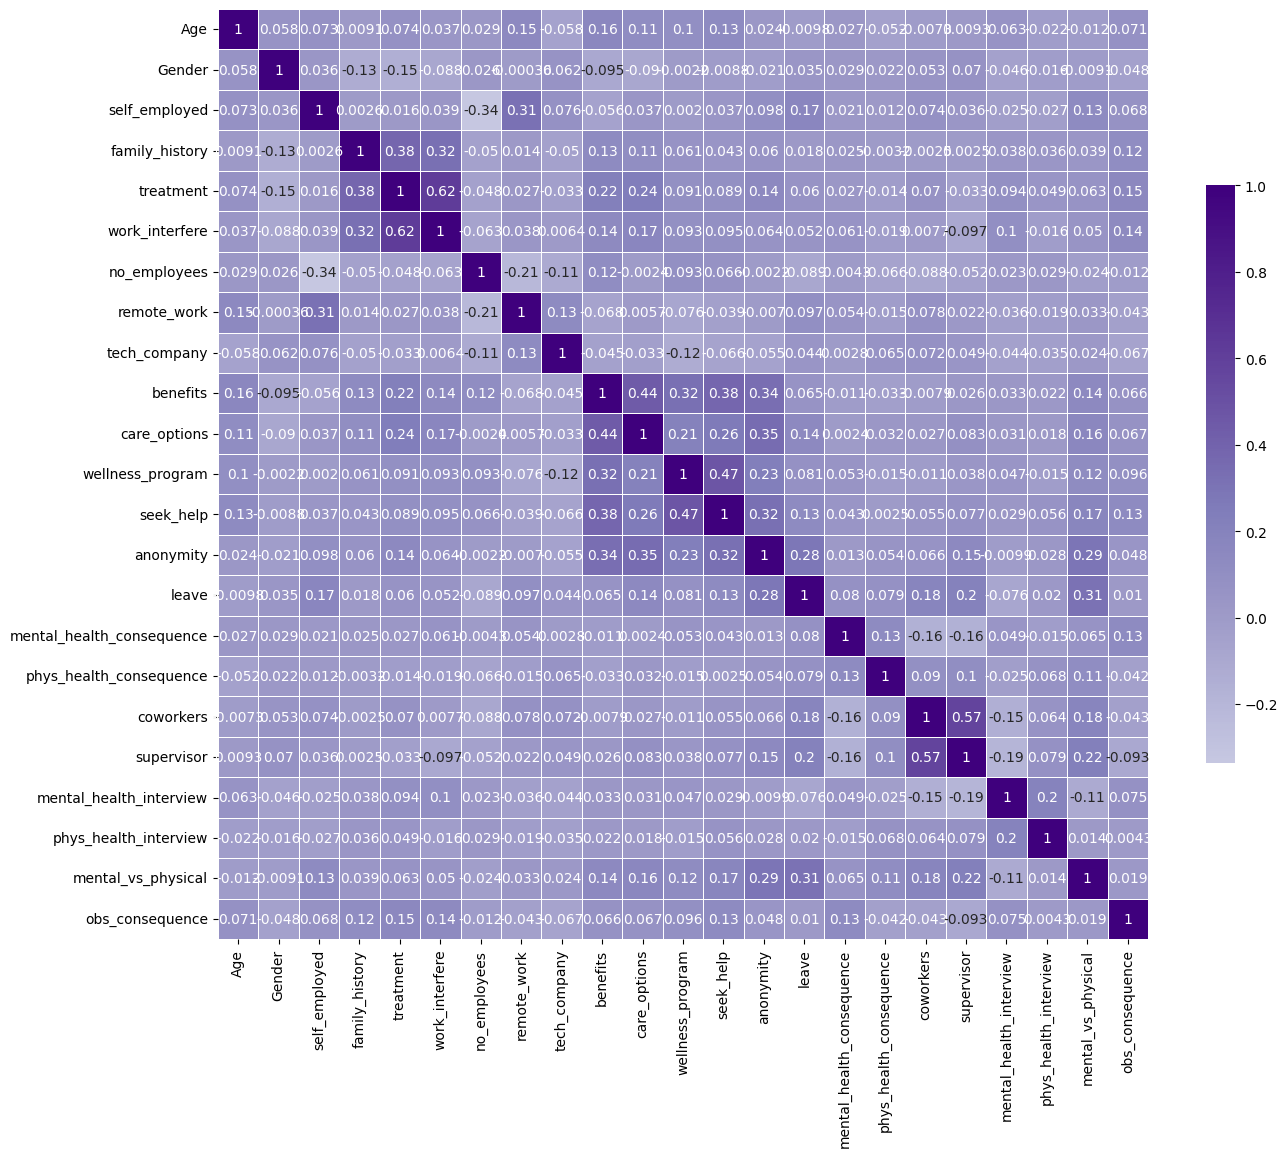

In [20]:
corr = df.corr()

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, cmap = 'Purples',  center=0,
            square = True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True)

#Algoritmos de Clasificación

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc,roc_curve, roc_auc_score

In [23]:
from sklearn.utils.extmath import weighted_mode
key = ['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassfier', 'KNeighborsClassifier']
value = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(random_state=10), KNeighborsClassifier(n_neighbors=3, weights = 'uniform')]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(),
 'DecisionTreeClassfier': DecisionTreeClassifier(random_state=10),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3)}

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1) #Variables independientes (Todas)
y = df['treatment'] #Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [25]:
#Entrenamiento de los modelos dentro de un ciclo
predicted = []
for name, valores in models.items():
  model = valores
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  acc = accuracy_score(y_test, predict) #Metrica para evaluacion
  predicted.append(acc)
  print(name, acc)

LogisticRegression 0.7845744680851063
RandomForestClassifier 0.8218085106382979
DecisionTreeClassfier 0.7606382978723404
KNeighborsClassifier 0.7287234042553191


<ipython-input-26-0e93b00b4530>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=predicted, y = key, palette='Purples')


Text(0.5, 1.0, 'Plotting the Model\xa0Accuracies')

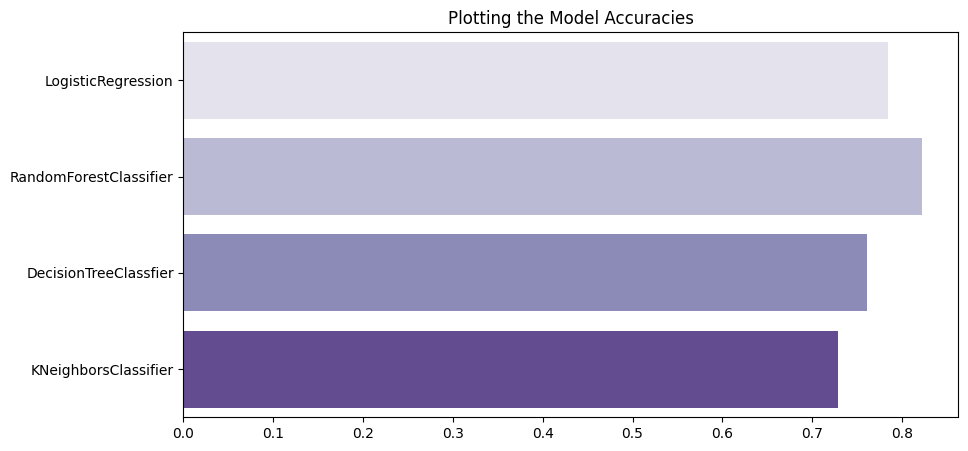

In [26]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=predicted, y = key, palette='Purples')
plt.title("Plotting the Model Accuracies")

In [27]:
##Regresión Logistica

Text(50.722222222222214, 0.5, 'Actual')

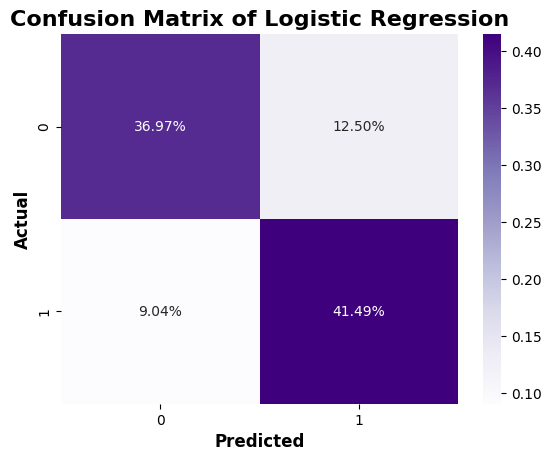

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Logistic Regression', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

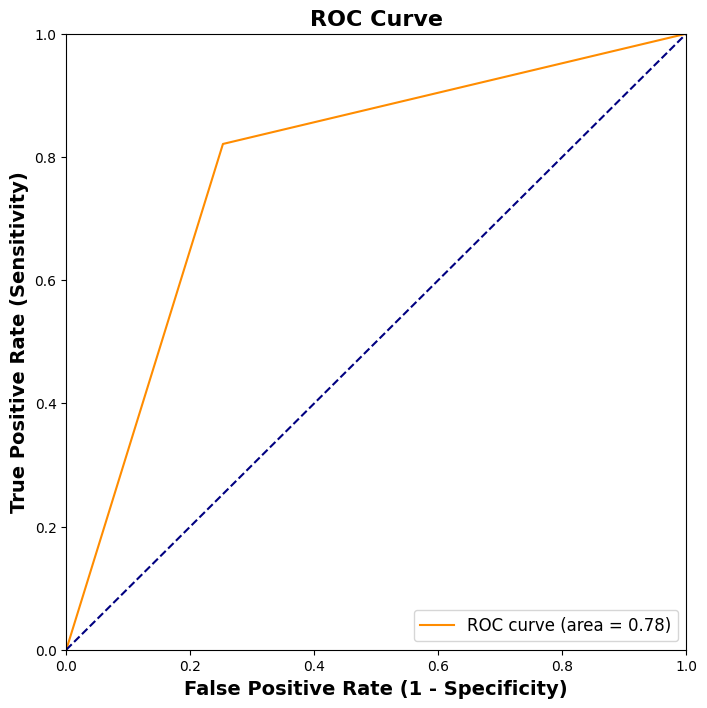

(array([0.        , 0.25268817, 1.        ]),
 array([0.        , 0.82105263, 1.        ]),
 array([inf,  1.,  0.]))

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test,pred)

##Random Forest

Text(46.722222222222214, 0.5, 'Actual')

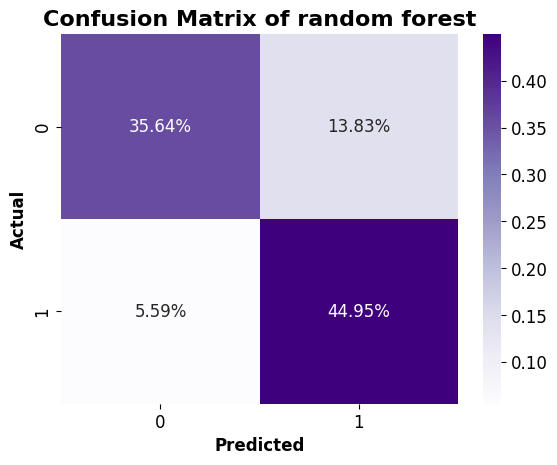

In [30]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
pred = random_forest.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of random forest', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

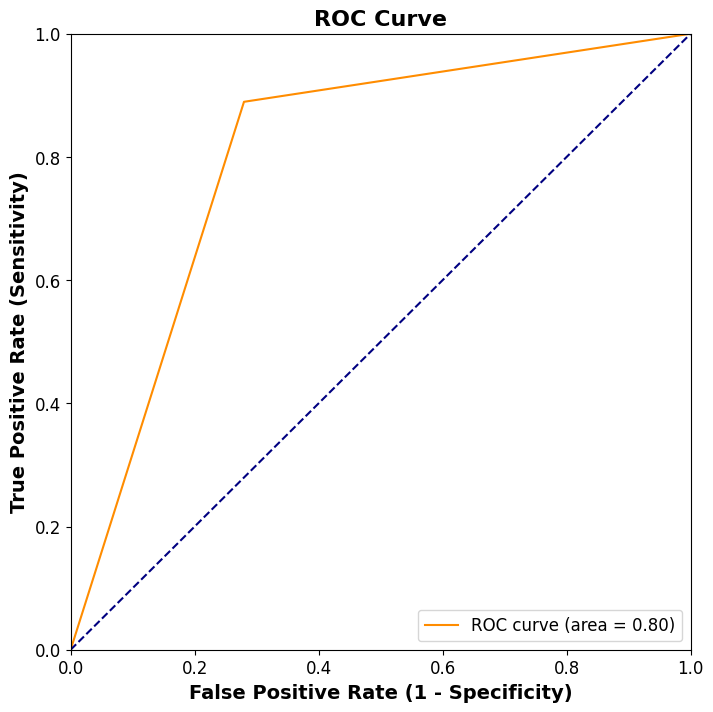

(array([0.        , 0.27956989, 1.        ]),
 array([0.        , 0.88947368, 1.        ]),
 array([inf,  1.,  0.]))

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred)

##Arboles de Decisión

Text(46.722222222222214, 0.5, 'Actual')

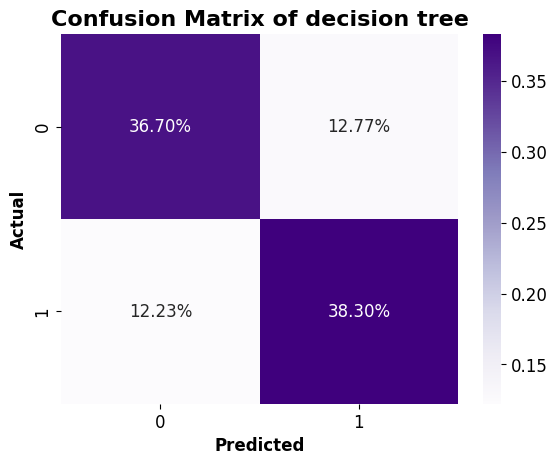

In [32]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
pred = d_tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of decision tree', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

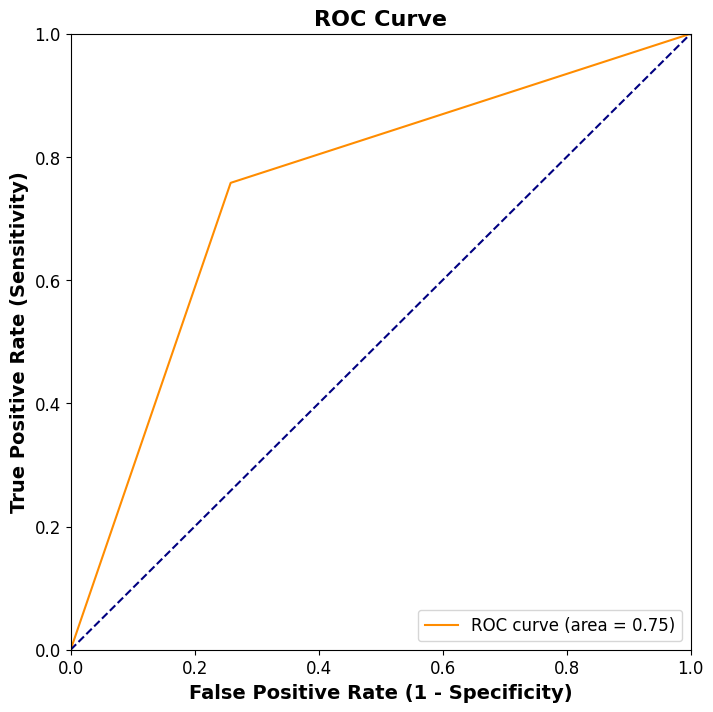

(array([0.        , 0.25806452, 1.        ]),
 array([0.        , 0.75789474, 1.        ]),
 array([inf,  1.,  0.]))

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred)

##KNN

Text(46.722222222222214, 0.5, 'Actual')

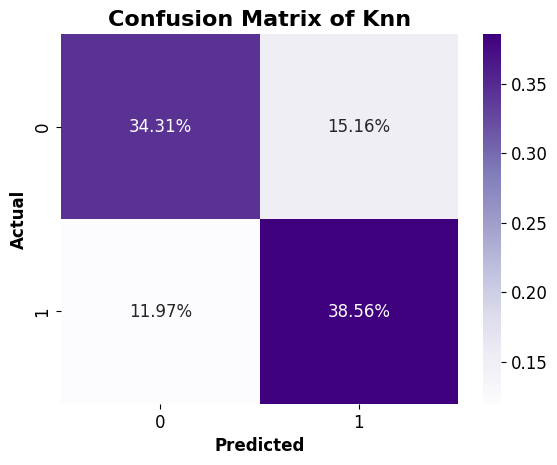

In [34]:
knn = KNeighborsClassifier(n_neighbors=3, weights = 'uniform')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Knn', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

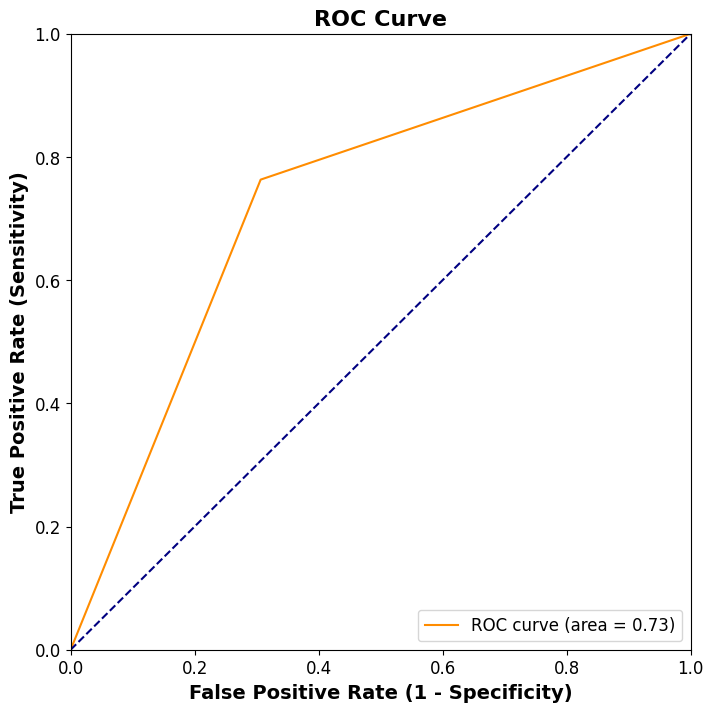

(array([0.        , 0.30645161, 1.        ]),
 array([0.        , 0.76315789, 1.        ]),
 array([inf,  1.,  0.]))

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred)

In [36]:
models1 = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(random_state=10),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors=3, weights = 'uniform')
}
]

Logistic Regression 0.7845744680851063
Decision Tree 0.7606382978723404
Random Forest 0.8058510638297872
KNN 0.7287234042553191


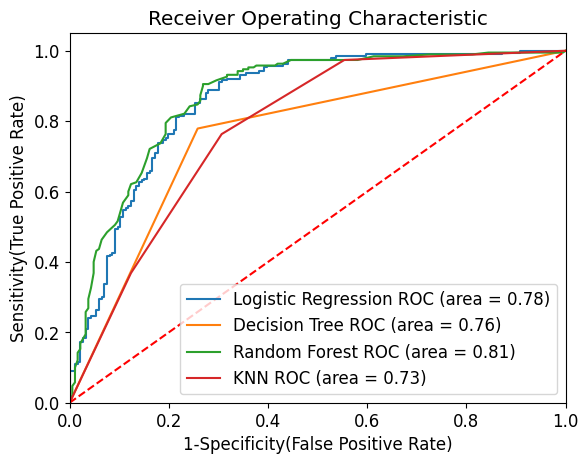

In [37]:
# Below for loop iterates through your models list
for m in models1:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    print(m['label'], acc)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display